In [33]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
# from google.colab import files

In [26]:
def get_data(filename):
    with open(filename) as training_file:
        csv_reader = csv.reader(training_file, delimiter=',')
        first_line = True
        temp_images = []
        temp_labels = []
        for row in csv_reader:
            if first_line:
                # print("Ignoring first line")
                first_line = False
            else:
                temp_labels.append(row[0])
                image_data = row[1:785]
                image_data_as_array = np.array_split(image_data, 28)
                temp_images.append(image_data_as_array)
        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float')
    return images, labels


training_images, training_labels = get_data('signs_mnist\sign_mnist_train.csv')
testing_images, testing_labels = get_data('signs_mnist\sign_mnist_test.csv')

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [58]:
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    rescale=1. / 255)

print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


3.0


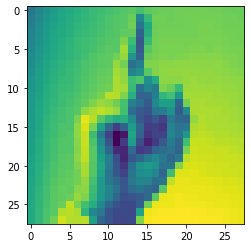

In [59]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])

In [86]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [87]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 64)              

In [88]:
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=30,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)

Epoch 1/30
857/857 [==============================] - 20s 22ms/step - loss: 2.9465 - accuracy: 0.1053 - val_loss: 2.3198 - val_accuracy: 0.2426
Epoch 2/30
857/857 [==============================] - 19s 22ms/step - loss: 2.2733 - accuracy: 0.2774 - val_loss: 1.5977 - val_accuracy: 0.4437
Epoch 3/30
857/857 [==============================] - 19s 22ms/step - loss: 1.8897 - accuracy: 0.3868 - val_loss: 1.7993 - val_accuracy: 0.3819
Epoch 4/30
857/857 [==============================] - 23s 26ms/step - loss: 1.6665 - accuracy: 0.4552 - val_loss: 1.2955 - val_accuracy: 0.5360
Epoch 5/30
857/857 [==============================] - 22s 25ms/step - loss: 1.5028 - accuracy: 0.5062 - val_loss: 1.0583 - val_accuracy: 0.6247
Epoch 6/30
857/857 [==============================] - 34s 39ms/step - loss: 1.3945 - accuracy: 0.5373 - val_loss: 0.9188 - val_accuracy: 0.6895
Epoch 7/30
857/857 [==============================] - 27s 31ms/step - loss: 1.3007 - accuracy: 0.5689 - val_loss: 0.8733 - val_accuracy:

In [89]:
model.evaluate(testing_images,testing_labels)

225/225 [==============================] - 2s 7ms/step - loss: 476.6463 - accuracy: 0.4313


[476.6463317871094, 0.43126046657562256]

In [90]:
pred=model.predict(testing_images)

In [91]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(testing_labels,np.argmax(pred,axis=1))
cm


array([[317,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,   4,
          0,   0,   0,   0,   7,   0,   0,   0,   0,   0,   0],
       [ 87, 192,   0,  14,  17,   2,   0,   0,  10,   6,   0,   0,   3,
          1,   0,  10,  23,   7,   0,   0,   0,   0,   0,  60],
       [  0,   0,  57,   0,   0,  16,   0,   0,   0,   0,   0,   0,   0,
        224,   0,  13,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  45,   0,   9,   0,   1,   0,   0,  58,  12,   0,
          1,   0,   5,  72,  19,   0,   0,   0,   0,  23,   0],
       [ 92,   0,   0,   3, 260,   5,   0,   0,   0,   0,   4,  11,   3,
          4,   0,   2,   6, 101,   0,   0,   0,   0,   7,   0],
       [  0,   0,   0,   0,   0, 247,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  25,  81,  67,   0,   0,   0,   0,   0,
         80,   0,  95,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   1,   0,   0,  40,  18

In [92]:
cm.shape

(24, 24)

In [93]:
values = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']

<AxesSubplot:>

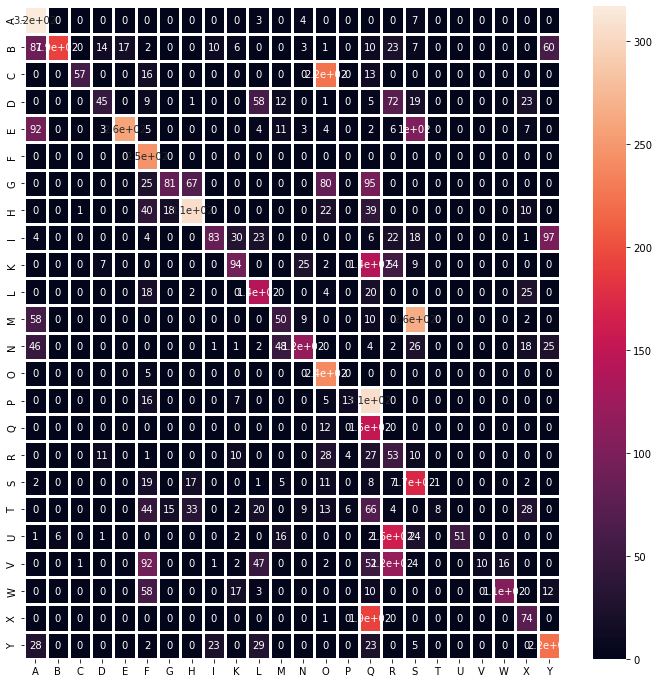

In [94]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,12))         
sns.heatmap(cm, annot=True, linewidths=3, ax=ax, xticklabels=values,yticklabels=values)

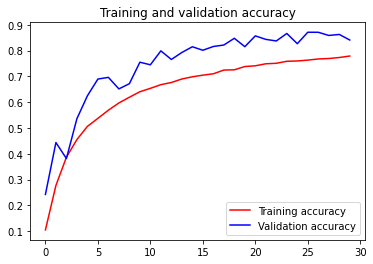

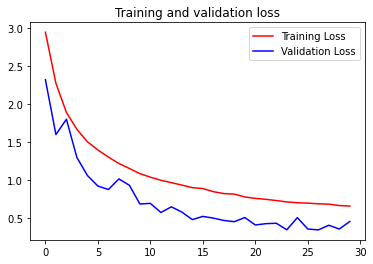

In [95]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()